In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import pearsonr

In [ ]:
years_to_be_studied = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', 
                       '2007', '2008', '2009', '2010', '2011', '2012', '2013',
                       '2014', '2015', '2016', '2017', '2018', '2019']

In [ ]:
df = pd.read_csv("API_SH.STA.SUIC.P5_DS2_en_csv_v2_4523805.csv", 
                  header=2,
                  skip_blank_lines=True
                  )
df = df.loc[:, ["Country Name", "Country Code",'2000', '2001', 
                '2002', '2003', '2004', '2005', '2006', '2007', 
                '2008', '2009', '2010', '2011', '2012', '2013',
                '2014', '2015', '2016', '2017', '2018', '2019', '2020']]\
       .dropna(axis=0, thresh=22)

df.head()

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,Africa Eastern and Southern,AFE,10.881722,10.512551,10.373434,10.229879,10.008202,9.864339,9.702909,9.664931,...,9.063698,8.859790,8.749414,8.565869,8.479565,8.324659,8.244062,8.128884,8.036293,NaN
2,Afghanistan,AFG,4.900000,5.000000,5.000000,5.000000,5.000000,5.000000,4.900000,4.800000,...,4.100000,4.000000,4.000000,3.900000,4.000000,4.000000,4.100000,4.100000,4.100000,NaN
3,Africa Western and Central,AFW,6.803571,6.719545,6.611609,6.599238,6.562576,6.568314,6.573377,6.561711,...,6.391096,6.301176,6.200686,5.998003,5.768566,5.672701,5.558145,5.429821,5.409499,NaN
4,Angola,AGO,8.700000,8.600000,8.600000,8.800000,8.600000,8.100000,8.600000,7.400000,...,6.600000,6.900000,6.900000,6.400000,6.500000,6.200000,6.000000,6.000000,6.100000,NaN
5,Albania,ALB,4.900000,4.500000,4.600000,4.800000,4.800000,7.500000,7.800000,8.100000,...,7.900000,5.200000,5.300000,5.000000,4.800000,4.700000,4.700000,4.500000,4.300000,NaN


In [ ]:
sns.set(style="darkgrid")

#Question: Does health indicator of a country correlate with the suicidal rate of a country? What conclusions can be drawn? 

Yes, the suicide rate correlates negatively with health indicators. This implies that countries with weaker health systems are prone to much more deaths by suicides. The trauma care needed for cases where suicide has been comitted and is bought to hospital in final stages, then emergency trauma care can save a lot of patients.

In [ ]:
df1 = pd.read_csv("/content/health-index-1.csv")
df1.head()

,id,utc_created,utc_updated,country,country_code,indicator_code,indicator,value,year
0,1,2016-01-07 10:10:52.689964,2016-01-07 10:10:52.690139,Afghanistan,AFG,72206,HDI: Health index,0.327,1980
1,2,2016-01-07 10:10:52.689964,2016-01-07 10:10:52.690139,Afghanistan,AFG,72206,HDI: Health index,0.375,1985
2,3,2016-01-07 10:10:52.689964,2016-01-07 10:10:52.690139,Afghanistan,AFG,72206,HDI: Health index,0.440,1990
3,4,2016-01-07 10:10:52.689964,2016-01-07 10:10:52.690139,Afghanistan,AFG,72206,HDI: Health index,0.498,1995
4,5,2016-01-07 10:10:52.689964,2016-01-07 10:10:52.690139,Afghanistan,AFG,72206,HDI: Health index,0.536,2000


In [ ]:
def draw_correlation_plot(country_name):
  afg_health_index = df1.loc[df1.country==country_name][["year", "value"]]
  afg_suicides = df.loc[df["Country Name"]==country_name][years_to_be_studied]
  afg_health_index.index = afg_health_index.year
  afg_health_index.drop("year",axis=1, inplace=True)
  afg_health_index = afg_health_index.loc[2000:]
  years_where_data_is_available = afg_health_index.index
  afg_suicides = afg_suicides[[str(year) for year in years_where_data_is_available]].T
  afg_suicides.columns = ["value"]

  sns.lineplot(data=afg_suicides)
  plt.ylabel("Suicide per 100k population")
  plt.show()

  sns.lineplot(data=afg_health_index)
  plt.ylabel("HDI Values")
  plt.show()

  corr, _ = pearsonr(afg_suicides.loc[:,"value"], afg_health_index.loc[:,"value"])
  print('Pearsons correlation: %.3f' % corr)

In [ ]:
df1.country.unique()

array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia (Plurinational State of)', 'Brazil',
       'Barbados', 'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Côte d'Ivoire", 'Cameroon',
       'Congo (Democratic Republic of the)', 'Congo', 'Colombia',
       'Comoros', 'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus',
       'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea',
       'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France',
       'Micronesia (Federated States of)', 'Gabon', 'United Kingdom',
       'Georgia', 'Ghana', '

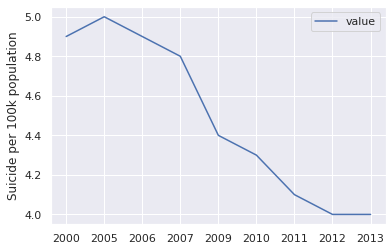

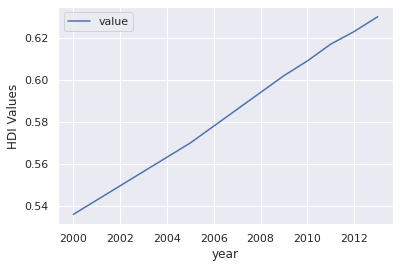

Pearsons correlation: -0.900


In [ ]:
draw_correlation_plot("Afghanistan")

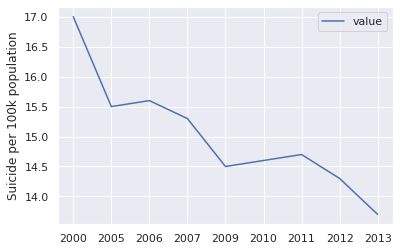

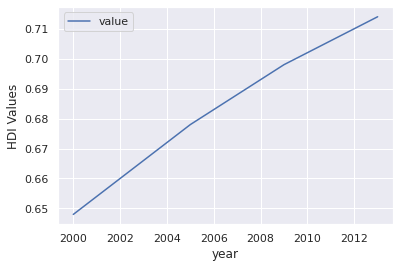

Pearsons correlation: -0.977


In [ ]:
draw_correlation_plot("India")

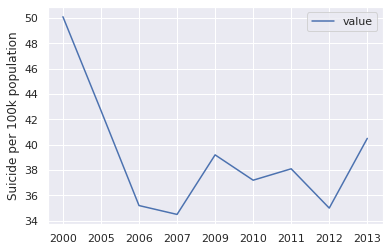

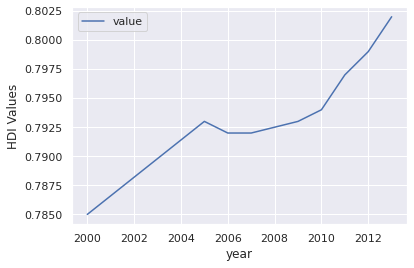

Pearsons correlation: -0.513


In [ ]:
draw_correlation_plot("Lithuania")

#Question: Does salary affect the suicidal rate of a country? What conclusions can be drawn?

#####In most cases yes!! Higher the salaries are lower are the suicide rates. Since, suicides are a result of depression and anxiety stemming from lack of affordability. With higher salaries people can afford better lifestyle and are not dependent anymore on government schemes that may be critical for their life.

In [ ]:
df2 = pd.read_csv("/content/Highest salary.csv")
df2.head()

,Country,Image,1990,1990.1,1991,1992,1993,1994,1995,1996,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2019.1
0,Australia,https://www.countryflags.io/au/flat/64.png,40102.17,NaN,39911.21,40712.37,41087.16,41365.72,41206.74,42427.50,...,53905.77,54226.19,53977.42,54391.76,53946.27,53971.60,53507.29,53349.41,53449.41,55449.41
1,Austria,https://www.countryflags.io/at/flat/64.png,40821.53,NaN,42097.56,42945.67,43295.82,43732.03,44084.35,43763.50,...,49578.91,49835.11,49896.49,50082.85,50373.81,50906.02,50851.40,50868.25,50888.25,52888.25
2,Belgium,https://www.countryflags.io/be/flat/64.png,41615.90,NaN,43445.31,44840.11,45781.94,46670.63,46512.58,47011.03,...,51204.94,51550.58,52221.58,52514.33,52120.11,51951.71,51736.10,52079.62,53079.62,54079.62
3,Switzerland,https://www.countryflags.io/ch/flat/64.png,50707.41,NaN,51605.26,52069.26,52598.74,53262.82,53414.40,53880.50,...,62107.93,63207.26,64180.86,64284.54,64222.84,64063.94,63899.88,64108.55,64608.55,66608.55
4,Denmark,https://www.countryflags.io/dk/flat/64.png,40078.45,NaN,40263.23,41653.12,42108.22,40596.46,41448.50,42207.41,...,51993.26,51923.10,52260.70,53260.74,54196.89,55032.35,54722.50,55253.34,55953.34,56953.34


In [ ]:
df2.Country.unique()

array(['Australia', 'Austria', 'Belgium', 'Switzerland', 'Denmark',
       'Germany', 'Iceland', 'Japan', 'Luxembourg', 'Netherlands',
       'Norway', 'USA'], dtype=object)

In [ ]:
columns = years_to_be_studied
columns.append("Country")

In [ ]:
def draw_correlation_plot_salary(country_name):
  high_salary = df2.loc[df2.Country==country_name][columns].T
  high_salary.columns = ["value"]
  high_salary.drop("Country", inplace=True)
  afg_suicides = df.loc[df["Country Name"]==country_name][years_to_be_studied]
  afg_suicides = afg_suicides[[str(year) for year in years_to_be_studied]].T
  afg_suicides.columns = ["value"]

  plt.figure(figsize=(10,5))
  sns.lineplot(data=afg_suicides)
  plt.ylabel("Suicides per 100k population")
  plt.xticks(rotation=35)
  plt.show()

  plt.figure(figsize=(10,5))
  sns.lineplot(data=high_salary)
  plt.xlabel("Years")
  plt.ylabel("Highest Salaries every year")
  plt.xticks(rotation=35)
  plt.show()

  corr, _ = pearsonr(afg_suicides.loc[:,"value"], high_salary.loc[:,"value"])
  print(f'Pearsons correlation:{corr}')

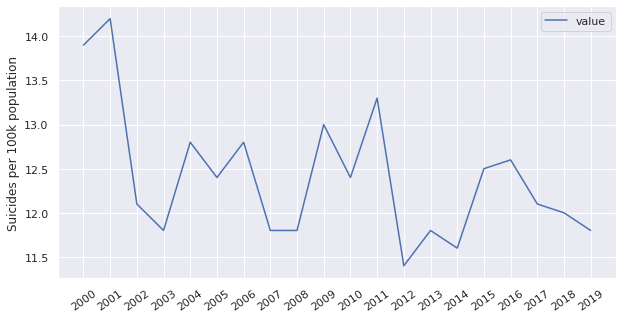

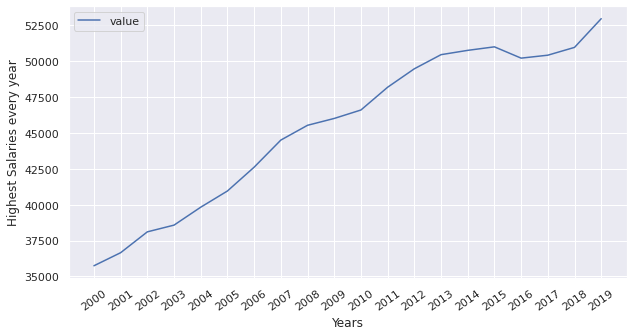

Pearsons correlation:-0.5330609198126223


In [ ]:
draw_correlation_plot_salary("Norway")

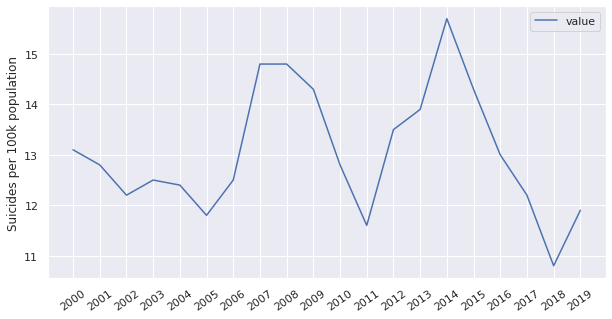

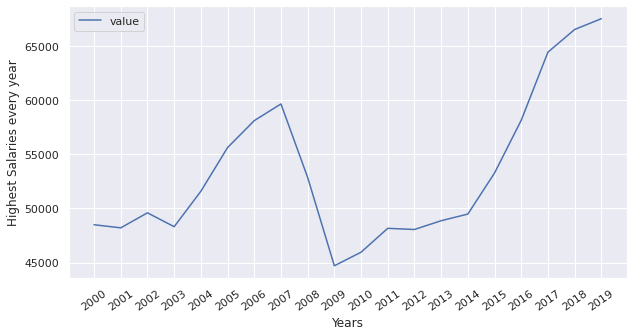

Pearsons correlation:-0.3704373779263976


In [ ]:
draw_correlation_plot_salary("Iceland")

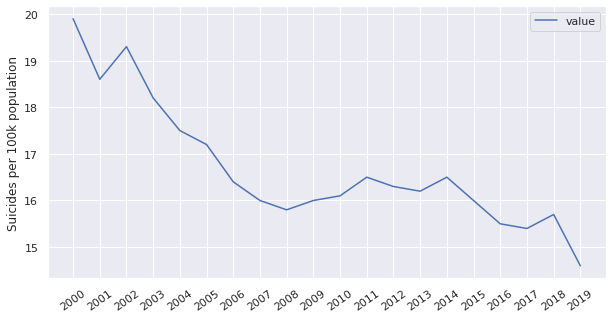

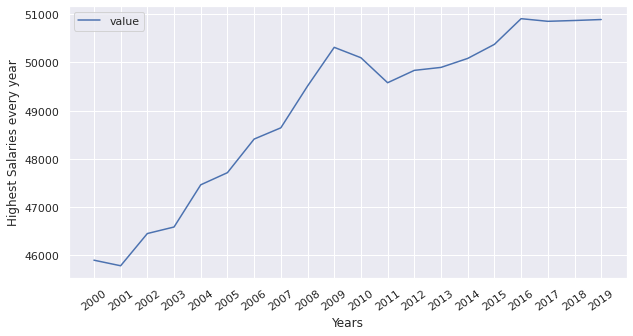

Pearsons correlation:-0.9258268949799148


In [ ]:
draw_correlation_plot_salary("Austria")

#Question: Does unemployment affect the suicidal rate of a country? What conclusions can be drawn?

#####Yes unemployement definitely affects the suicide rate of a country. They are directly proportional to each other. Higher the unemployemnt rate higher are the chances of suicides. 

In [ ]:
df3 = pd.read_csv("/content/unemployment analysis.csv")
df3.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,...,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,Africa Western and Central,AFW,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,...,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,...,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82


In [ ]:
df3["Country Name"].unique()

array(['Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Arab World',
       'United Arab Emirates', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin',
       'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain',
       'Bahamas, The', 'Bosnia and Herzegovina', 'Belarus', 'Belize',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Denmark', 'Dominican Republic', 'Algeria',
       'East Asia & Pacific (excluding high income)',
       'Early-demographic dividend', 'East Asia & Pacific',
       

In [ ]:
cols = years_to_be_studied
cols.append("Country Name")

In [ ]:
def draw_correlation_plot_unemployement(country_name):
  unemployed = df3.loc[df3["Country Name"]==country_name][cols].T
  unemployed.columns = ["value"]
  unemployed.drop("Country Name", inplace=True)
  afg_suicides = df.loc[df["Country Name"]==country_name][years_to_be_studied]
  afg_suicides = afg_suicides[[str(year) for year in years_to_be_studied]].T
  afg_suicides.columns = ["value"]
  afg_suicides.drop("Country Name", inplace=True)

  plt.figure(figsize=(10,5))
  sns.lineplot(data=afg_suicides)
  plt.ylabel("Suicides per 100k population")
  plt.xticks(rotation=35)
  plt.show()

  plt.figure(figsize=(10,5))
  sns.lineplot(data=unemployed)
  plt.xlabel("Years")
  plt.ylabel("Unemployment Rates every year")
  plt.xticks(rotation=35)
  plt.show()

  corr, _ = pearsonr(afg_suicides.loc[:,"value"], unemployed.loc[:,"value"])
  print(f'Pearsons correlation:{corr}')

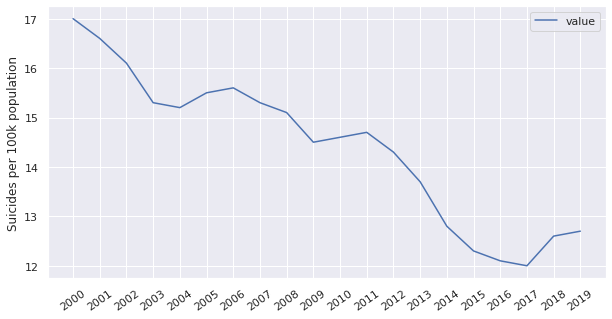

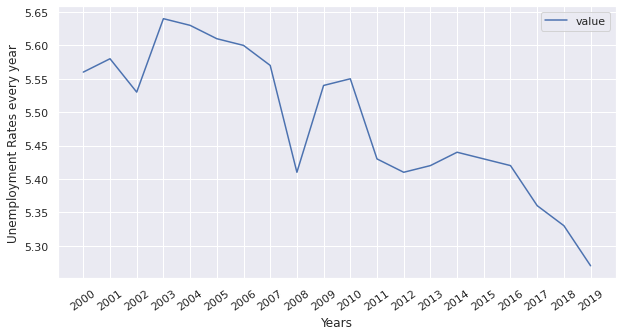

Pearsons correlation:0.7588892415313762


In [ ]:
draw_correlation_plot_unemployement("India")

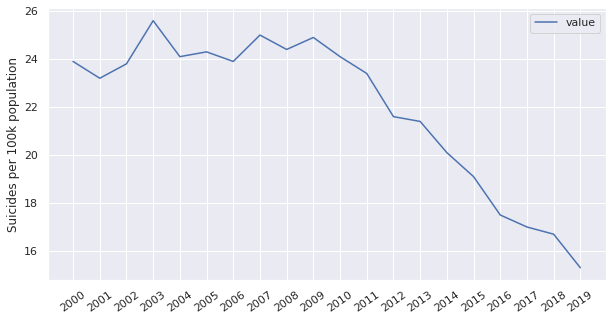

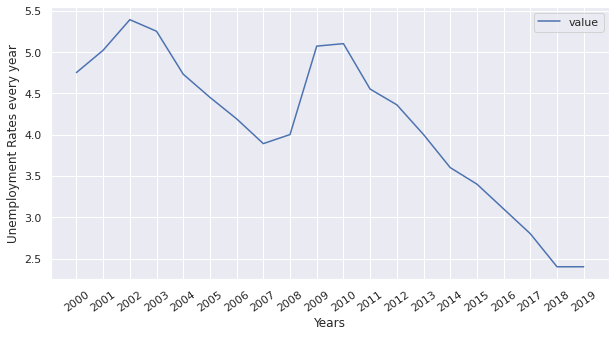

Pearsons correlation:0.8905817757971703


In [ ]:
draw_correlation_plot_unemployement("Japan")

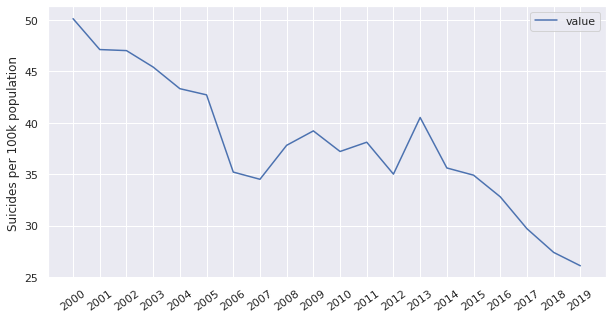

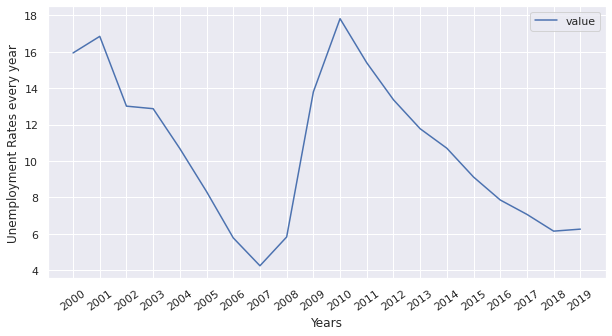

Pearsons correlation:0.6327260271338006


In [ ]:
draw_correlation_plot_unemployement("Lithuania")